## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Graph Construction

In [2]:
def construct_graph(data):
    G = nx.MultiDiGraph()
    for index, row in data.iterrows():
        G.add_weighted_edges_from([(row['Sender'], row['Receiver'], row['Amount'])])
    return G

df = pd.read_csv('Payments.csv')
myGraph = construct_graph(df)

## Embedding Graph nodes with node2vec embedding

In [3]:
# Step 2: Embed nodes using Node2Vec
node2vec = Node2Vec(myGraph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)


node_embeddings = [model.wv.get_vector(str(node)) for node in myGraph.nodes()]

# Convert node embeddings to array
embedding_matrix = np.array(node_embeddings)



Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:01<00:00, 25.70it/s]


## Kmeans Clustering on resultant embedded graph nodes

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


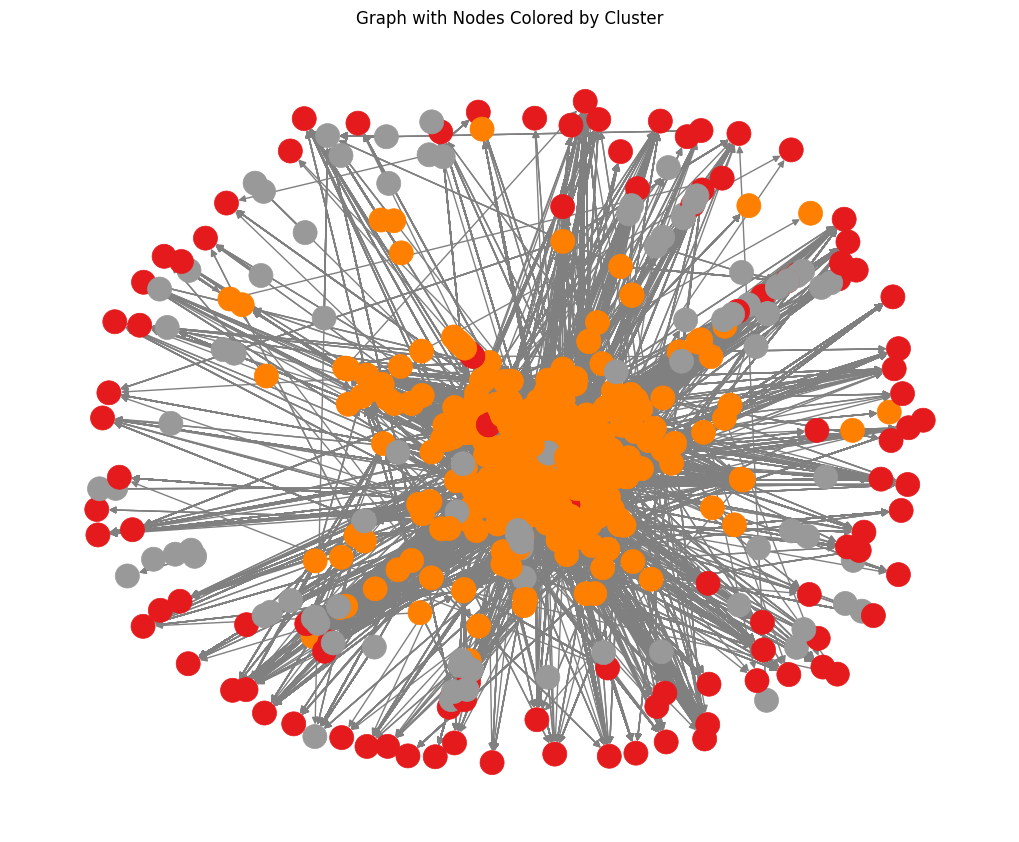

In [4]:

# Apply KMeans clustering
num_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embedding_matrix)


# Plot the graph with nodes colored by cluster
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(myGraph, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(myGraph, pos, node_color=clusters, cmap=plt.cm.Set1, node_size=300, with_labels=False, edge_color='gray', linewidths=0.5)
plt.title('Graph with Nodes Colored by Cluster')
plt.show()

## Checking Optimal Clusters count with K means inertia

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

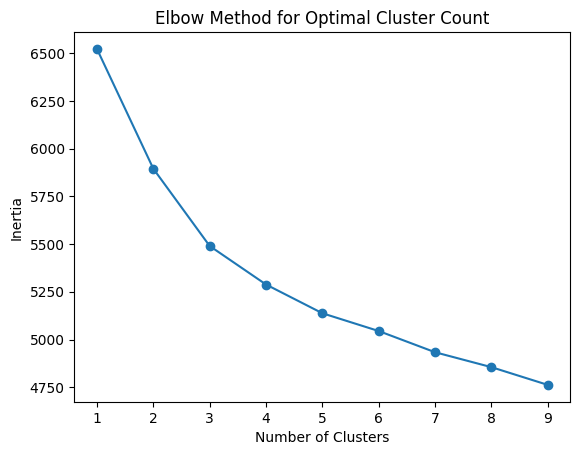

In [5]:
# Initialize a list to store inertia values
inertia_values = []

# Try different cluster counts
cluster_range = range(1, 10)  # You can adjust the range of cluster counts
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(embedding_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Count')
plt.show()

## Checking Optimal Clusters count with Silhouette Scores

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

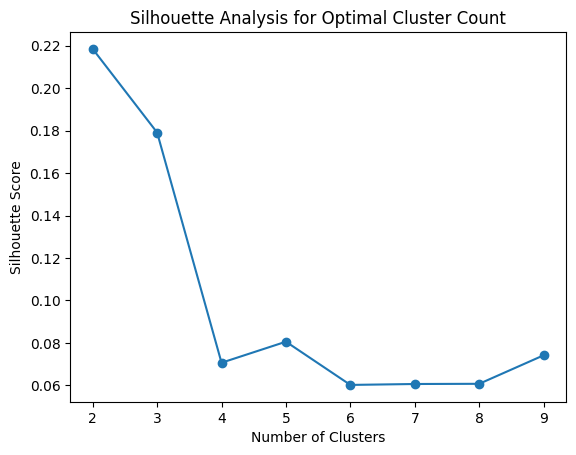

In [6]:
# Initialize a list to store silhouette scores
silhouette_scores = []

# Try different cluster counts
cluster_range = range(2, 10)  # You can adjust the range of cluster counts
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding_matrix)
    silhouette_scores.append(silhouette_score(embedding_matrix, cluster_labels))

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Cluster Count')
plt.show()

## DBSCAN Clustering on resultant embedded nodes

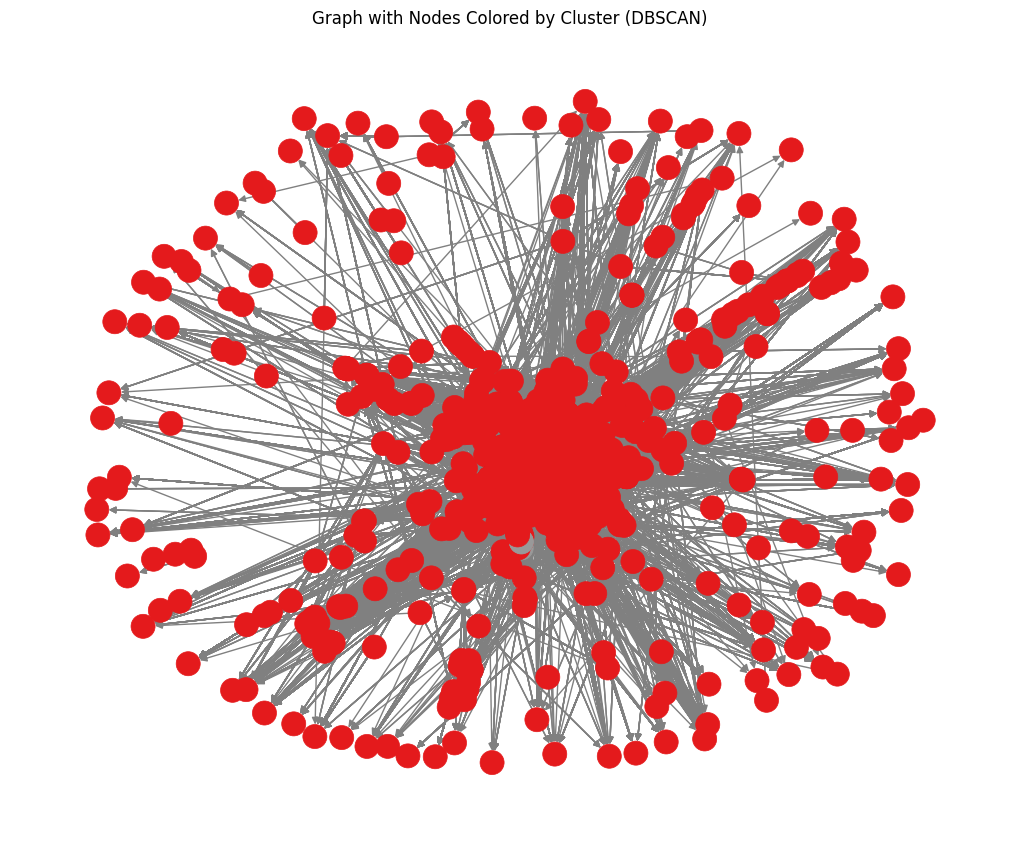

In [7]:

# Apply DBSCAN clustering
eps = 1  # The maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(embedding_matrix)


# Plot the graph with nodes colored by cluster
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(myGraph, seed=42)  # Position nodes using the spring layout algorithm
nx.draw(myGraph, pos, node_color=clusters, cmap=plt.cm.Set1, node_size=300, with_labels=False, edge_color='gray', linewidths=0.5)
plt.title('Graph with Nodes Colored by Cluster (DBSCAN)')
plt.show()

/home/asus/jupyter/environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


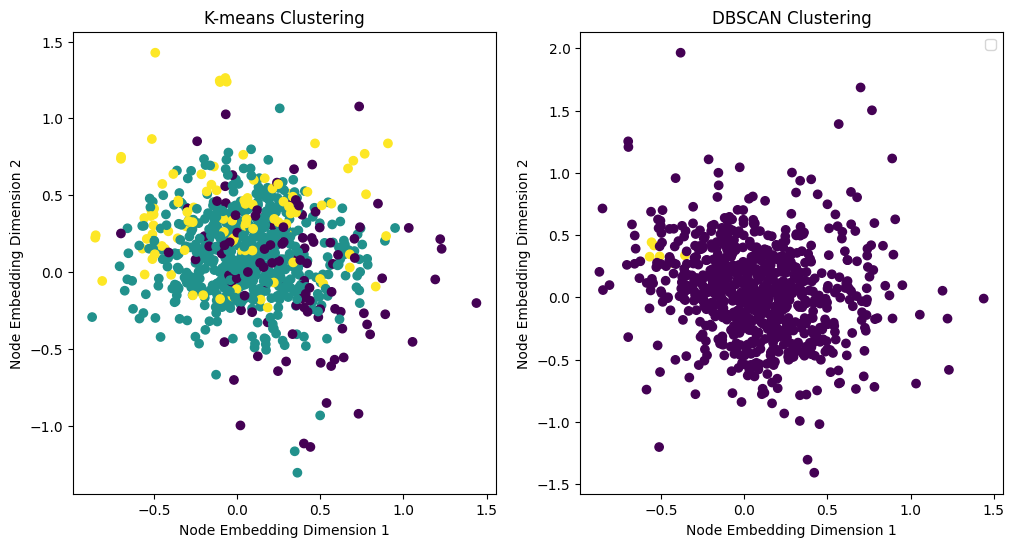

K-means cluster sizes:
[109 587 103]
[  6 793]


In [9]:

X = np.array([model.wv.get_vector(str(node)) for node in myGraph.nodes()])

# Use K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Use DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 2], c=kmeans_labels)
plt.title("K-means Clustering")
plt.xlabel("Node Embedding Dimension 1")
plt.ylabel("Node Embedding Dimension 2")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Node Embedding Dimension 1")
plt.ylabel("Node Embedding Dimension 2")
plt.legend()
plt.show()

# Print the cluster sizes
print("K-means cluster sizes:")
print(np.bincount(kmeans_labels))
# change -1 to 1 to avoid error
dbscan_labels[dbscan_labels == -1] = 1
print(np.bincount(dbscan_labels))